Importing the modules

# Welcome to the notebook 🙂

### Task 1 - Importing the Dataset

In [30]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("Modules are imported!")

Modules are imported!


In [31]:
data = pd.read_csv("D:\Files\Files\home\jovyan\work\Creditcard_dataset.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2    10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3    10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4    11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
1 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
2  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512  0.251367   
3  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710 -0.767315   
4  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744  0.548265   

        V26       V27       V28  Amount  Class  
0 -0.221929  0.062723  0.061458  123.50      0  
1 -0.051634 -1.206921 -1.085339   40.80      0  
2 -0.129478  0.042850  0.016253    7.80      0  
3 -0.492208  0.042472 -0.054337    9.99      0  
4  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 31 columns]

Check the data shape

In [32]:
data.shape

(50492, 31)

Let's see how many genuine and limited fraudulent records we have

In [33]:
data.Class.value_counts()

Class
0    50000
1      492
Name: count, dtype: int64

### Task 2 - Data Preprocessing and Exploration

*   Removing all the rows with `Nan` values
*   Removing `Time` column
*   Feature Scaling `Amount` column
*   Split the data into features and labels
*   Data Exploration


Removing the rows `Nan` values in the dataset

In [34]:
data.dropna(inplace=True)
data.shape

(50492, 31)

Removing Time column

In [35]:
data.drop(axis=1, columns='Time', inplace=True)
data.head

<bound method NDFrame.head of              V1        V2        V3        V4        V5        V6        V7  \
0     -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1     -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2      1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3      0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4      1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   
...         ...       ...       ...       ...       ...       ...       ...   
50487 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
50488  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
50489 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
50490 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
50491  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

             V8      

Feature Scaling of Amount column

In [36]:
scaler=StandardScaler()
data['Amount']=scaler.fit_transform(data[['Amount']])
data.head

<bound method NDFrame.head of              V1        V2        V3        V4        V5        V6        V7  \
0     -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1     -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2      1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3      0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4      1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   
...         ...       ...       ...       ...       ...       ...       ...   
50487 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
50488  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
50489 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
50490 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
50491  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

             V8      

Let's split the genuine and fraud records into separate dataframes

In [37]:
data_fraud=data[data.Class==1]
data_genuine=data[data.Class==0]

In [38]:
data_genuine

V1         V2        V3        V4        V5        V6        V7  \
0      -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1      -0.644269   1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2       1.449044  -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3       0.384978   0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4       1.069374   0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   
...          ...        ...       ...       ...       ...       ...       ...   
49995  -1.266580  -0.400461  0.956221 -0.723919  1.531993 -1.788600  0.314741   
49996   0.219529   0.881246 -0.635891  0.960928 -0.152971 -1.014307  0.427126   
49997  -1.775135  -0.004235  1.189786  0.331096  1.196063  5.519980 -1.518185   
49998 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837 -4.918215   
49999   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260 -0.296827   

             V8        V9       V10  ...       V21       V22       V23  \
0      0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321   
1     -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504   
2      0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740   
3      0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130   
4      0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407   
...         ...       ...       ...  ...       ...       ...       ...   
49995  0.004704  0.013857 -0.815911  ... -0.157831 -0.883365  0.088485   
49996  0.121340 -0.285670 -0.111640  ...  0.099936  0.337120  0.251791   
49997  2.080825  1.159498 -0.594242  ...  0.103302  0.654850 -0.348929   
49998  7.305334  1.914428  4.356170  ...  0.213454  0.111864  1.014480   
49999  0.708417  0.432454 -0.484782  ...  0.232045  0.578229 -0.037501   

            V24       V25       V26       V27       V28    Amount  Class  
0     -1.175575  0.647376 -0.221929  0.062723  0.061458  0.150105      0  
1     -0.649709 -0.415267 -0.051634 -1.206921 -1.085339 -0.199848      0  
2      0.500512  0.251367 -0.129478  0.042850  0.016253 -0.339490      0  
3      0.996710 -0.767315 -0.492208  0.042472 -0.054337 -0.330223      0  
4      0.104744  0.548265  0.104094  0.021491  0.021293 -0.256128      0  
...         ...       ...       ...       ...       ...       ...    ...  
49995 -0.076790 -0.095833  0.132720 -0.028468  0.126494 -0.368731      0  
49996  0.057688 -1.508368  0.144023  0.181205  0.215243 -0.270727      0  
49997  0.745323  0.704545 -0.127579  0.454379  0.130308 -0.034011      0  
49998 -0.509348  1.436807  0.250034  0.943651  0.823731 -0.369238      0  
49999  0.640134  0.265745 -0.087371  0.004455 -0.026561 -0.085256      0  

[50000 rows x 30 columns]

In [39]:
data_fraud

V1        V2        V3        V4        V5        V6        V7  \
50000 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
50001 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
50002 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
50003 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
50004  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   
...         ...       ...       ...       ...       ...       ...       ...   
50487 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
50488  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
50489 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
50490 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
50491  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

             V8        V9       V10  ...       V21       V22       V23  \
50000  1.391657 -2.770089 -2.772272  ...  0.517232 -0.035049 -0.465211   
50001 -0.067794 -0.270953 -0.838587  ...  0.661696  0.435477  1.375966   
50002 -0.399147 -0.238253 -1.525412  ... -0.294166 -0.932391  0.172726   
50003 -0.248778 -0.247768 -4.801637  ...  0.573574  0.176968 -0.436207   
50004 -0.496358 -1.282858 -2.447469  ... -0.379068 -0.704181 -0.656805   
...         ...       ...       ...  ...       ...       ...       ...   
50487  0.697211 -2.064945 -5.587794  ...  0.778584 -0.319189  0.639419   
50488  0.248525 -1.127396 -3.232153  ...  0.370612  0.028234 -0.145640   
50489  1.210158 -0.652250 -3.463891  ...  0.751826  0.834108  0.190944   
50490  1.058733 -1.632333 -5.245984  ...  0.583276 -0.269209 -0.456108   
50491 -0.068384  0.577829 -0.888722  ... -0.164350 -0.295135 -0.072173   

            V24       V25       V26       V27       V28    Amount  Class  
50000  0.320198  0.044519  0.177840  0.261145 -0.143276 -0.372497      1  
50001 -0.293803  0.279798 -0.145362 -0.252773  0.035764  1.866017      1  
50002 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  0.642790      1  
50003 -0.053502  0.252405 -0.657488 -0.827136  0.849573 -0.122833      1  
50004 -1.632653  1.488901  0.566797 -0.010016  0.146793 -0.368265      1  
...         ...       ...       ...       ...       ...       ...    ...  
50487 -0.294885  0.537503  0.788395  0.292680  0.147968  1.277825      1  
50488 -0.081049  0.521875  0.739467  0.389152  0.186637 -0.369281      1  
50489  0.032070 -0.739695  0.471111  0.385107  0.194361 -0.042898      1  
50490 -0.183659 -0.328168  0.606116  0.884876 -0.253700  0.664244      1  
50491 -0.450261  0.313267 -0.289617  0.002988 -0.015309 -0.192527      1  

[492 rows x 30 columns]

Split the data into features and labels

In [40]:
X=data.drop("Class",axis=1)
y=data.Class

Data Exploration
  - Apply PCA to reduce the dimensionality of features `X` into two dimensions
  - Use a scatter plot to visualize our data

In [41]:
pca=PCA(2)
tranformed_data=pca.fit_transform(X)
df=pd.DataFrame(tranformed_data)
df['label']=y
df

0         1  label
0       0.447840 -1.197485      0
1       0.582393 -0.258062      0
2       0.939390  0.728299      0
3       0.630766  0.499103      0
4       0.536287  1.055403      0
...          ...       ...    ...
50487 -10.855752  2.787388      1
50488  -6.927753  4.949703      1
50489  -7.038193  2.785114      1
50490 -11.649179  1.991772      1
50491   0.227987  2.009611      1

[50492 rows x 3 columns]

Let's Use a scatter plot to visualize our data

In [42]:
px.scatter(df,x=0,y=1,color=df.label.astype(str))

### Task 3 - Building the Generator Model

Write a method to create the Generator model architecture

In [52]:
def build_generator():
    model=Sequential()
    
    model.add(Dense(32,activation='relu',input_dim=29,kernel_initializer='he_uniform'))
    model.add(BatchNormalization())

    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(29,activation='relu'))
    model.summary()

    return model
build_generator()

c:\Users\jidaa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,029 (62.61 KB)

 Trainable params: 15,581 (60.86 KB)

 Non-trainable params: 448 (1.75 KB)

<Sequential name=sequential_24, built=True>

### Task 4 - Building the Discriminator Model

Write a method to create the Discriminator model architecture

In [49]:
def build_discriminator():
    model=Sequential()
    model.add(Dense(128,input_dim=29,activation='relu',kernel_initializer='he_uniform'))

    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy')
    model.summary()
    return model
build_discriminator()
    

c:\Users\jidaa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,777 (61.63 KB)

 Trainable params: 15,777 (61.63 KB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential_19, built=True>

### Task 5 - Combine Generator and Discriminator models to Build The GAN

In [45]:
def build_gan(generator,discriminator):
    discriminator.trainable=False
    gan_input=Input(shape=(generator.input_shape[1],))
    x=gan_input
    gan_output=discriminator(x)
    gan=Model(gan_input,gan_output)
    gan.summary()
    return gan

Let's create a method that generates synthetic data using the Generator

In [46]:
def generate_synthetic_data(generator, num_samples):
    noise=np.random.normal(0,1,(num_samples,generator.input_shape[1]))
    fake_data=generator(noise)
    return fake_data

### Task 6 - Train and evaluate our GAN
*    Defining some variables
*    Creating our GAN
*    Training the GAN
*    Monitor the GAN performance using PCA




In [47]:
def monitor_generator(generator):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)

    # Drop the 'Class' column from the fraud dataset to get real data
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)

    # Create a DataFrame for the transformed real data and add a 'label' column with the value 'real'
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    # Generate synthetic fraud data using the provided generator and specify the number of samples (492 in this case)
    synthetic_fraud_data = generate_synthetic_data(generator, 492)

    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)

    # Create a DataFrame for the transformed fake data and add a 'label' column with the value 'fake'
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    # Concatenate the real and fake data DataFrames
    df_combined = pd.concat([df_real, df_fake])

    # Create a scatterplot to visualize the data points, using the first and second PCA components as x and y, respectively,
    # and color points based on the 'label' column, with a size of 10
    plt.figure()
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.show()

c:\Users\jidaa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_154 (Dense)               │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,029 (62.61 KB)

 Trainable params: 15,581 (60.86 KB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_158 (Dense)               │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,777 (61.63 KB)

 Trainable params: 15,777 (61.63 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_227"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_45 (InputLayer)     │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_32 (Sequential)      │ (None, 1)              │        15,777 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,777 (61.63 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 15,777 (61.63 KB)

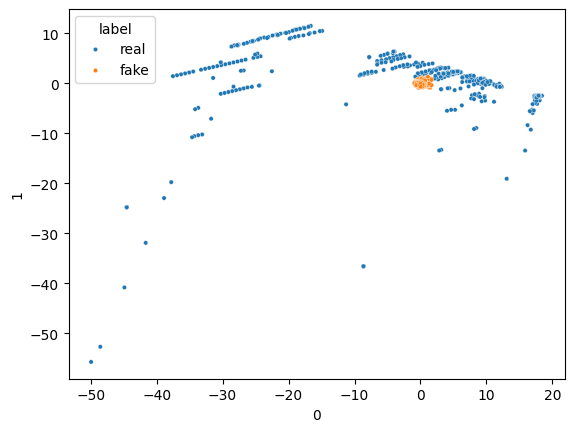

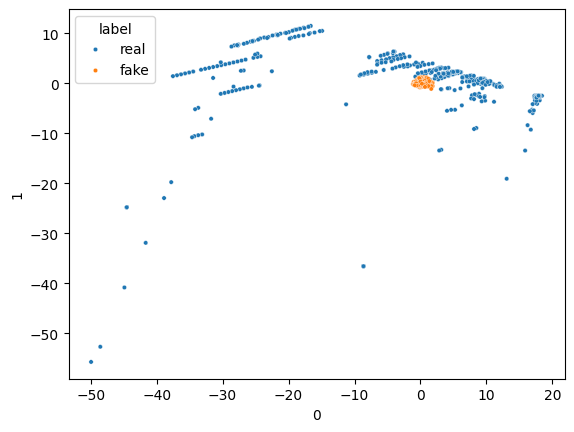

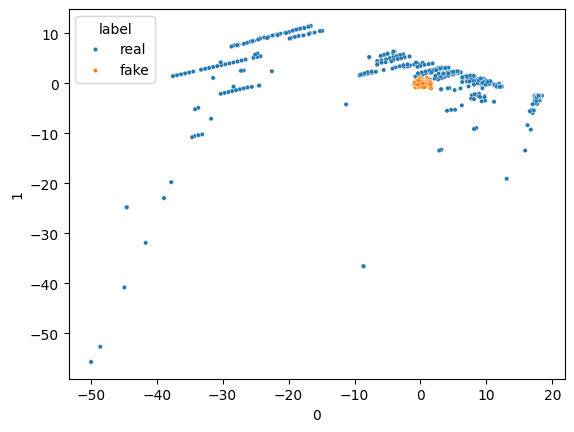

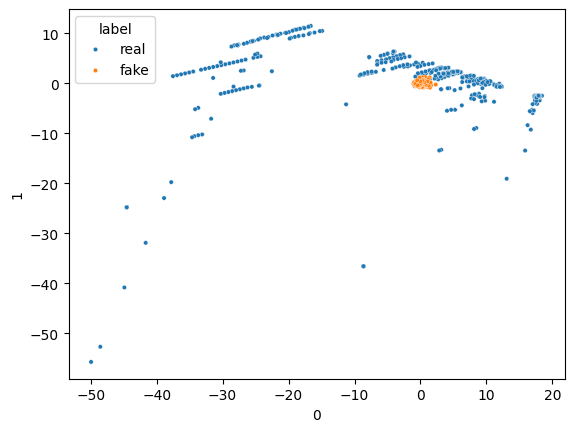

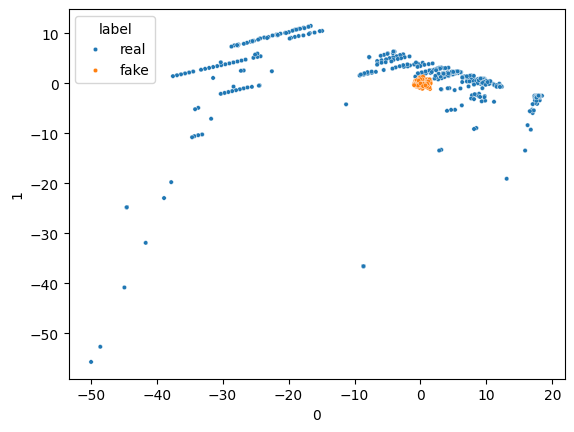

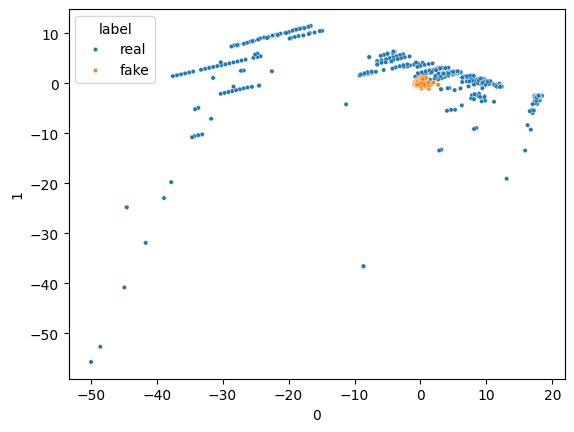

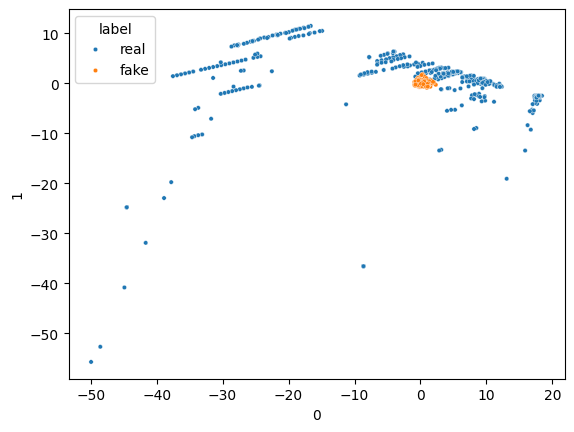

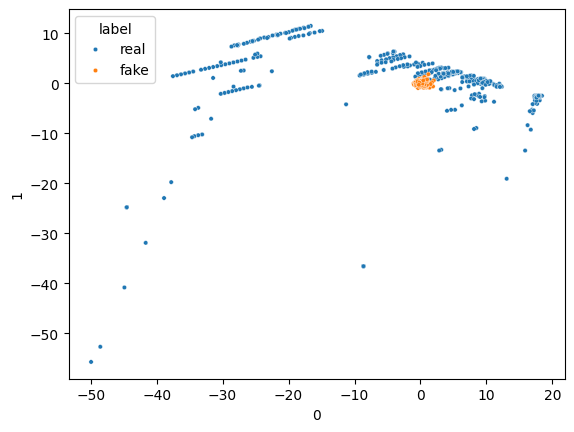

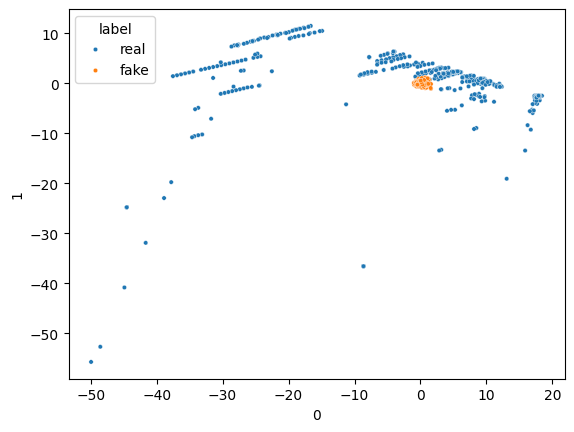

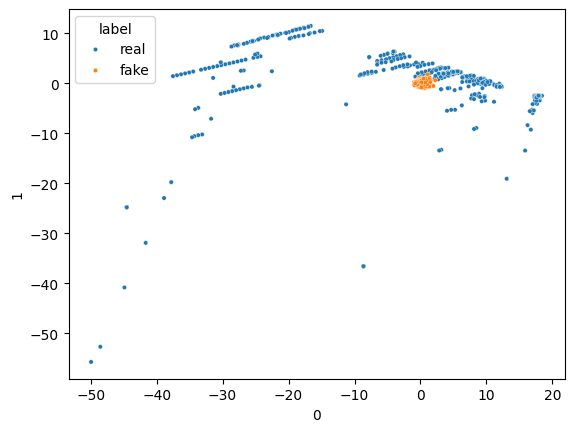

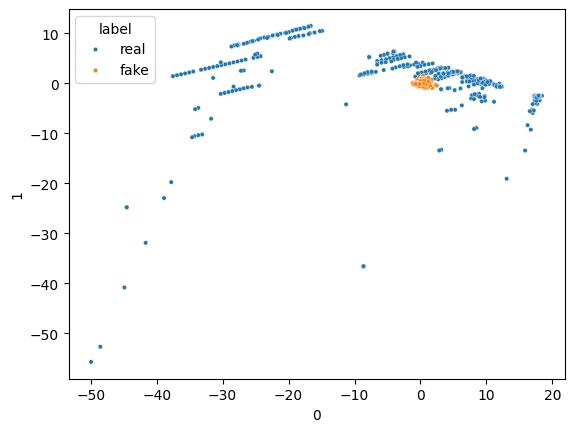

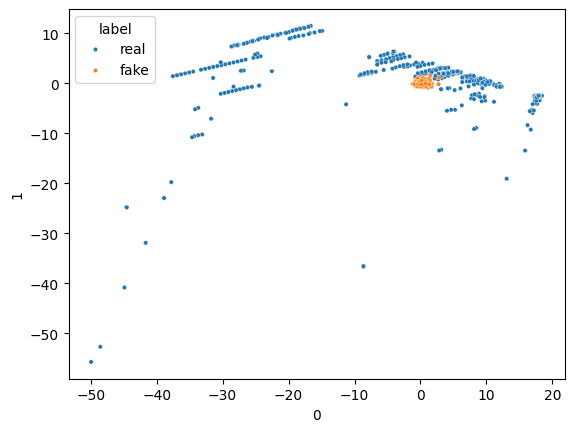

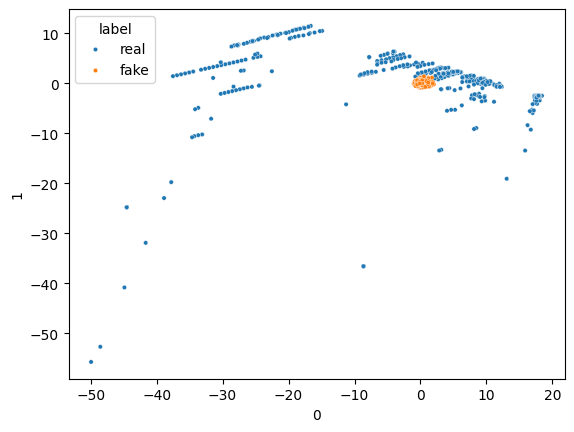

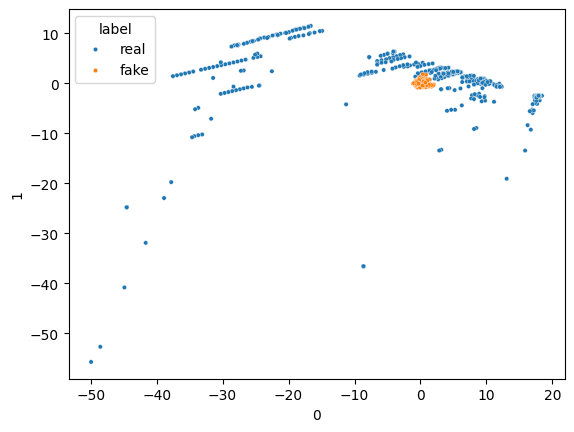

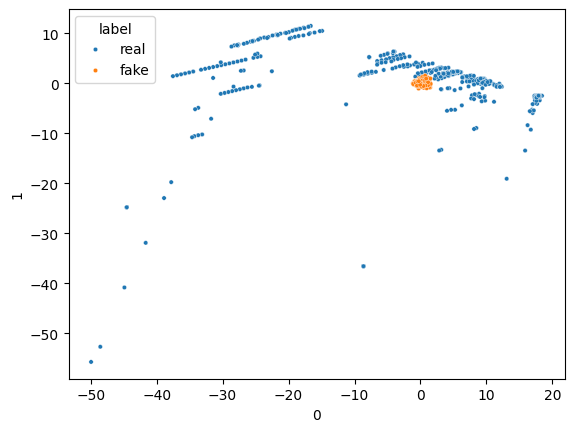

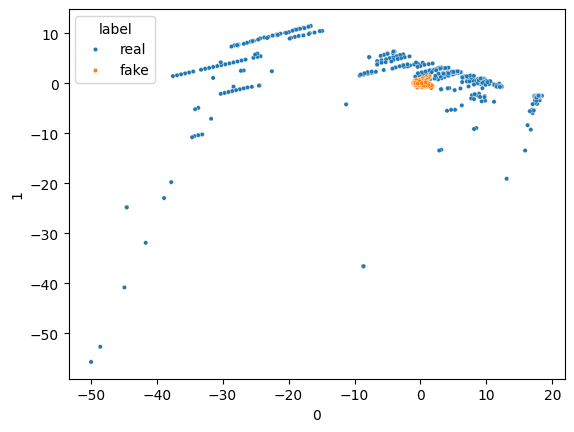

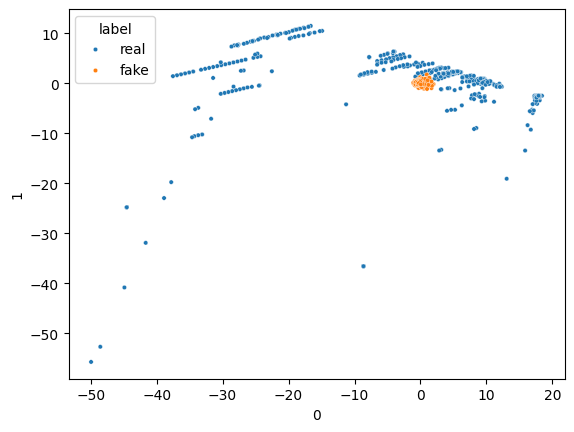

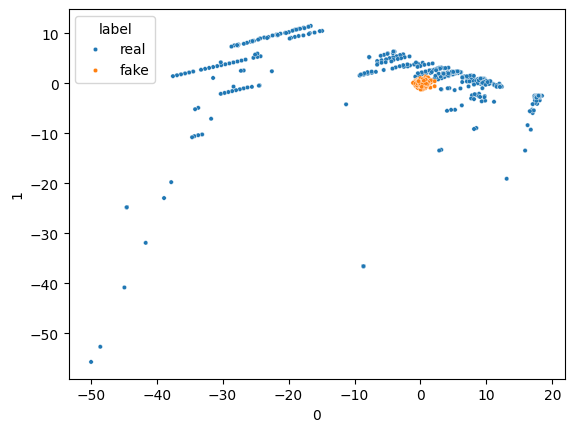

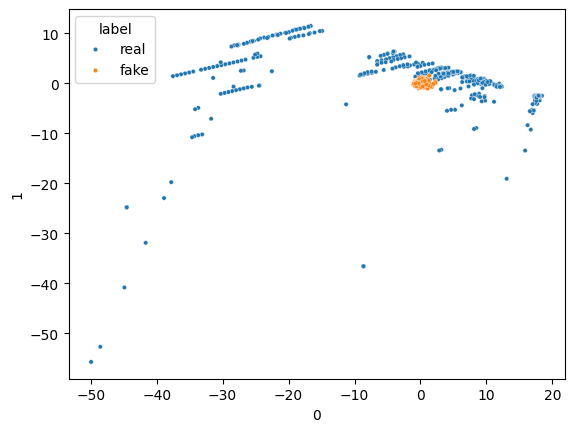

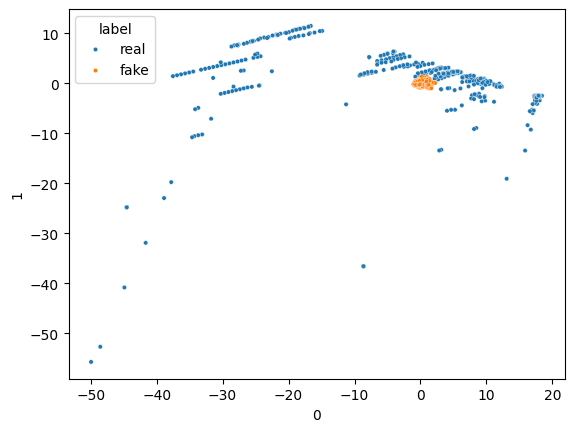

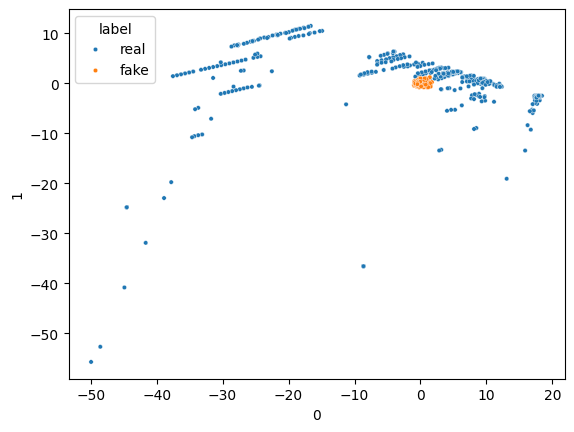

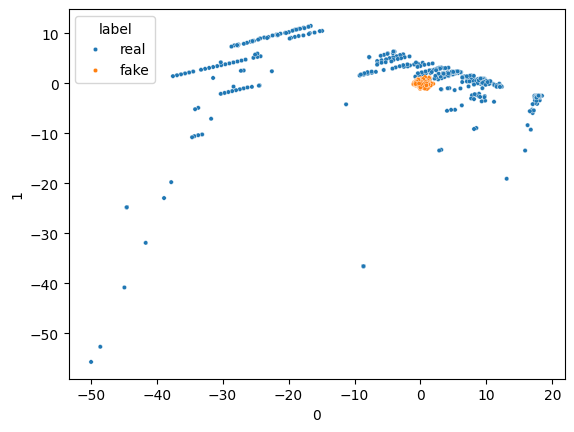

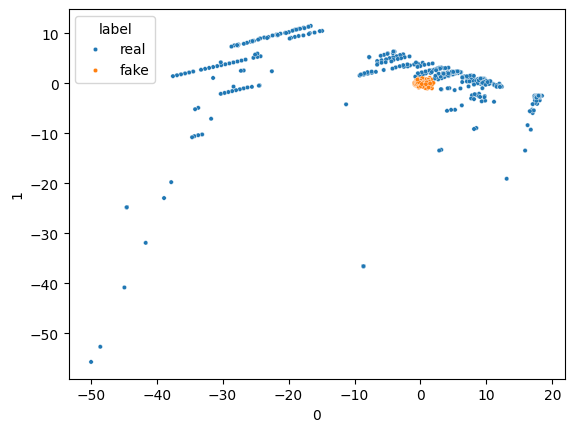

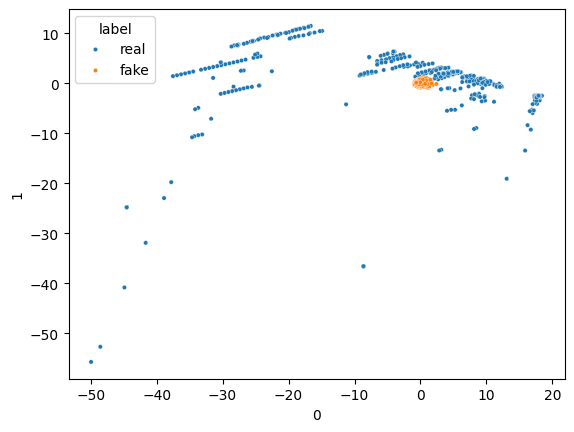

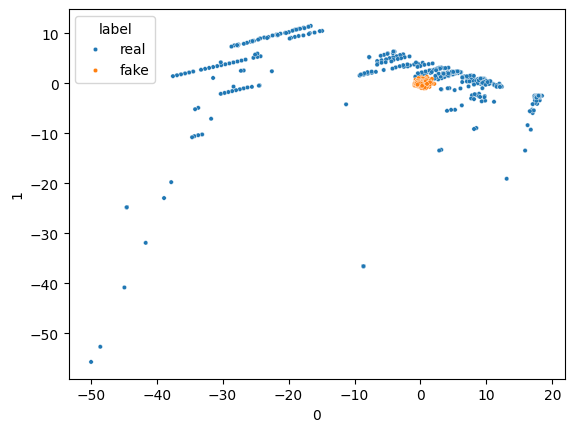

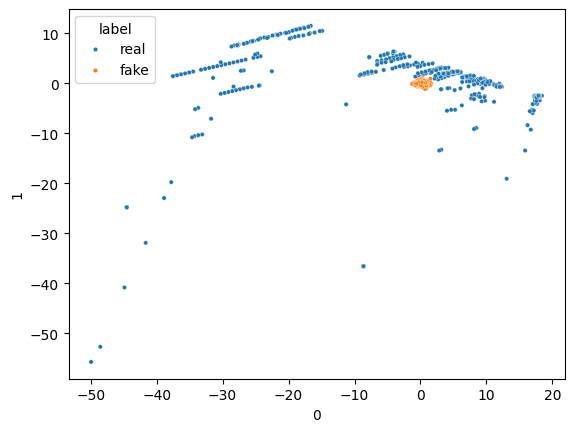

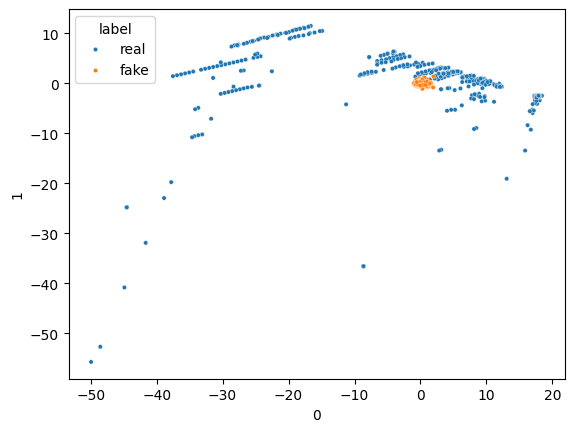

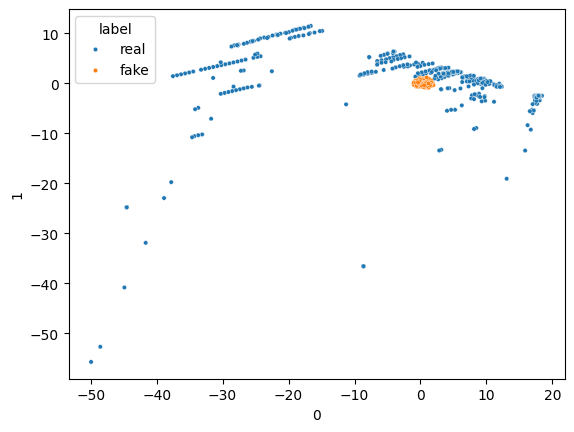

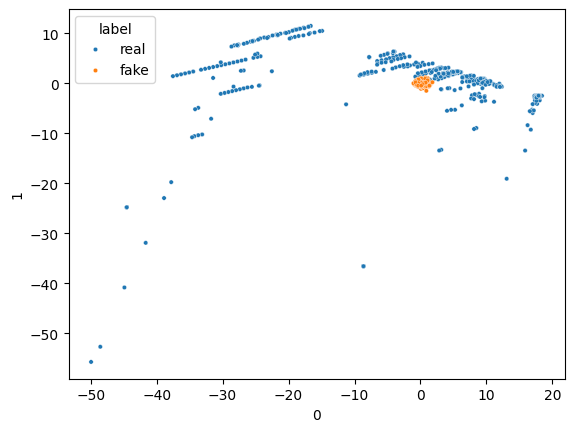

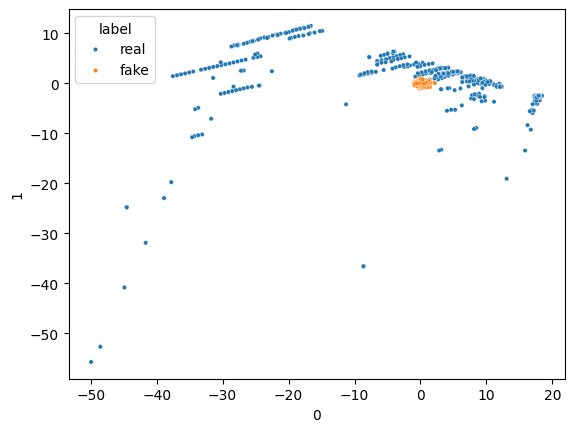

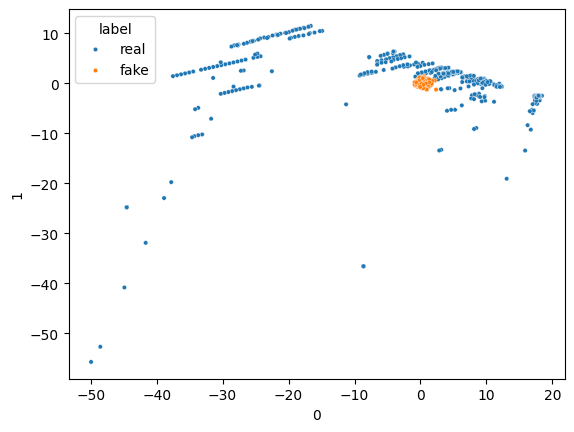

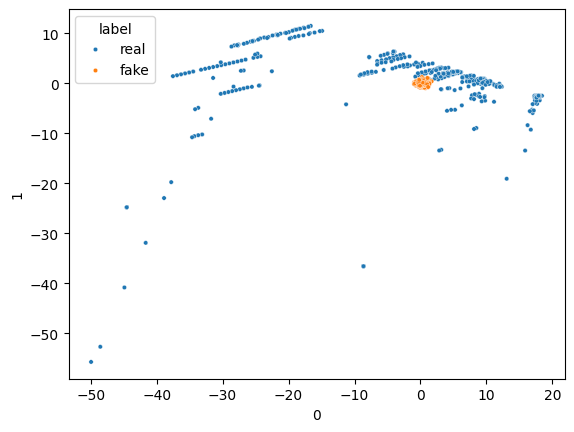

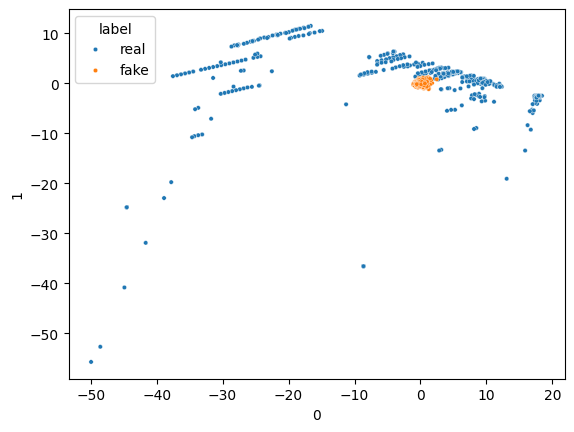

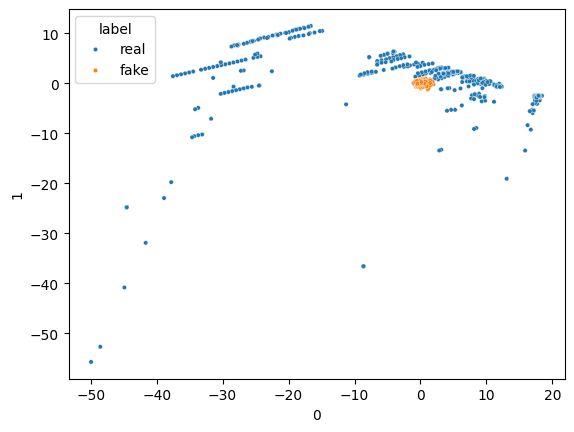

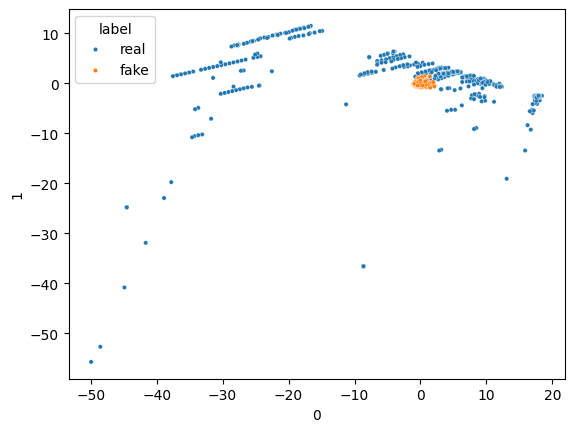

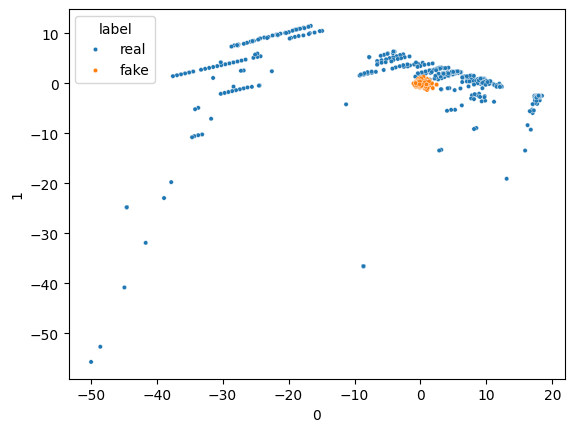

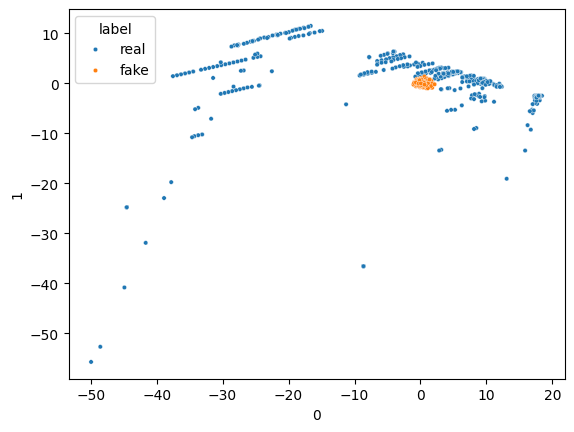

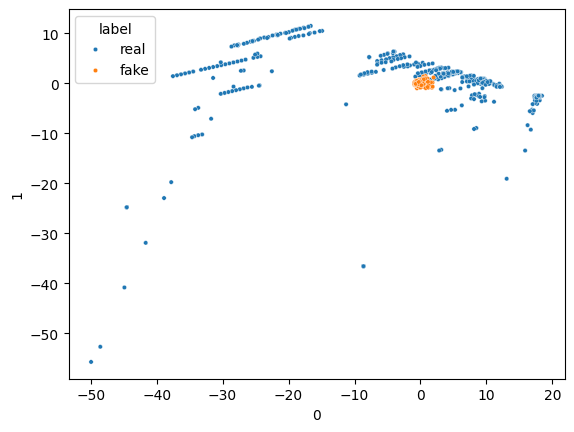

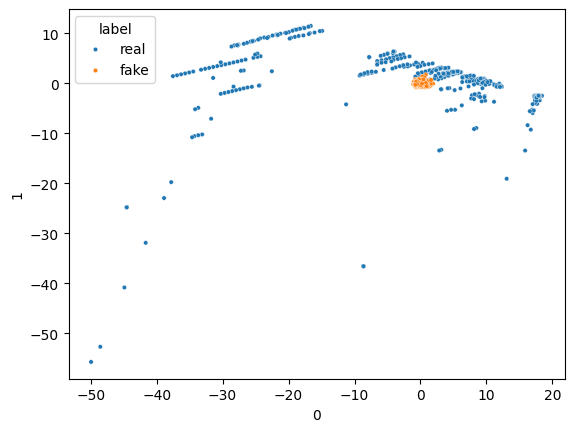

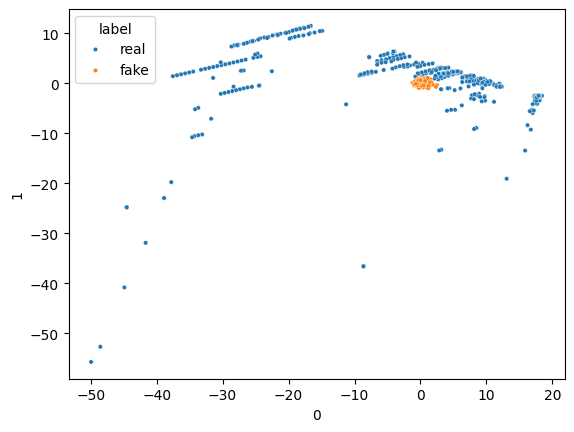

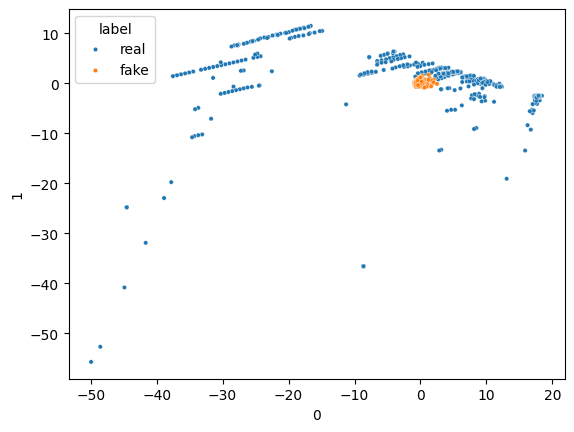

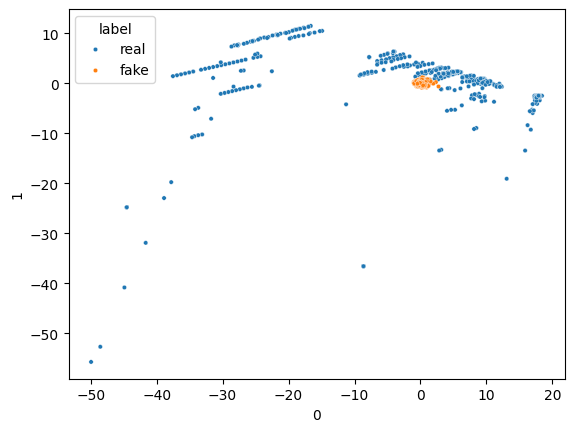

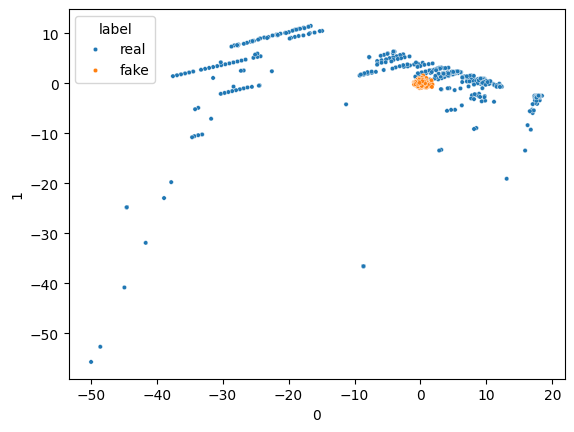

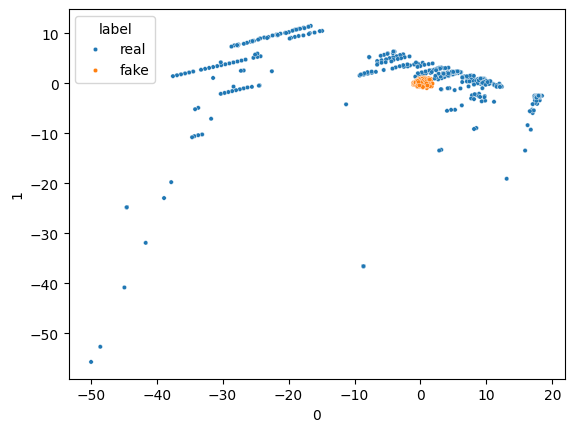

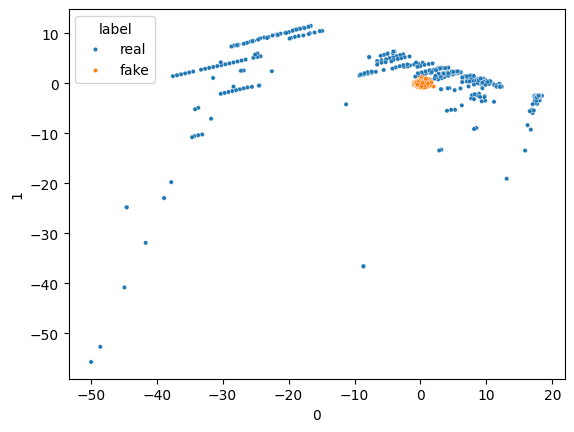

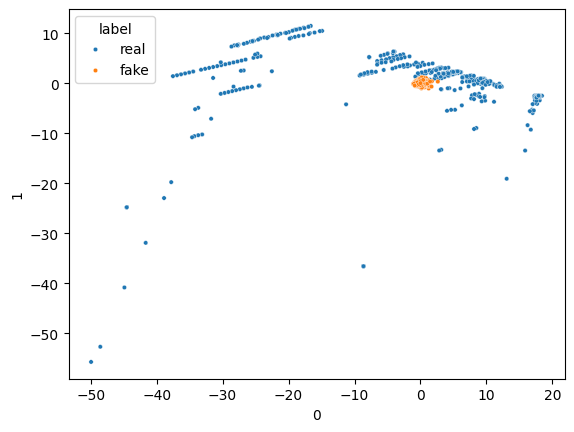

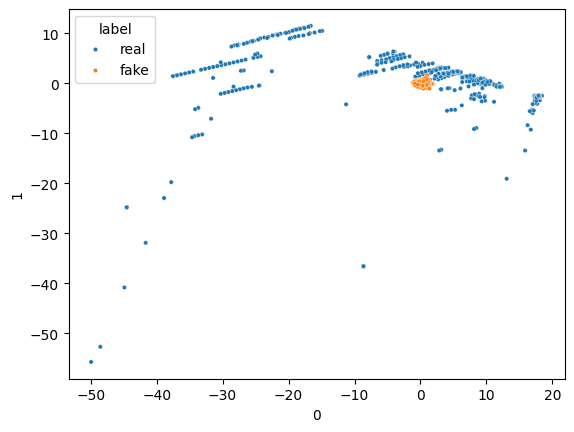

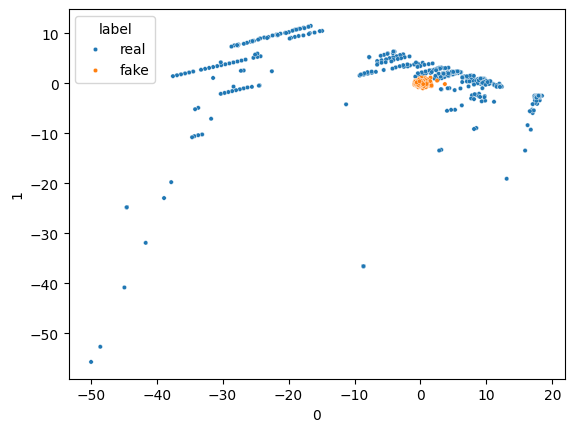

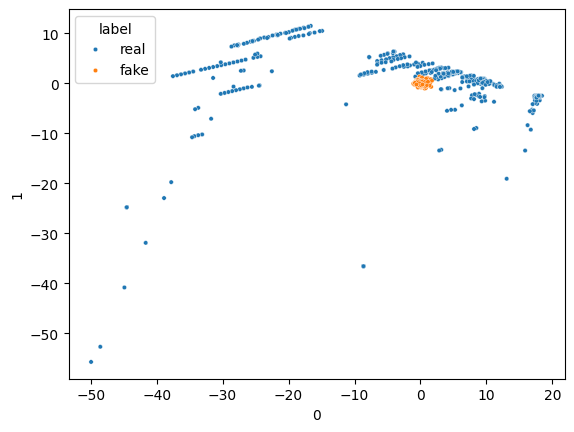

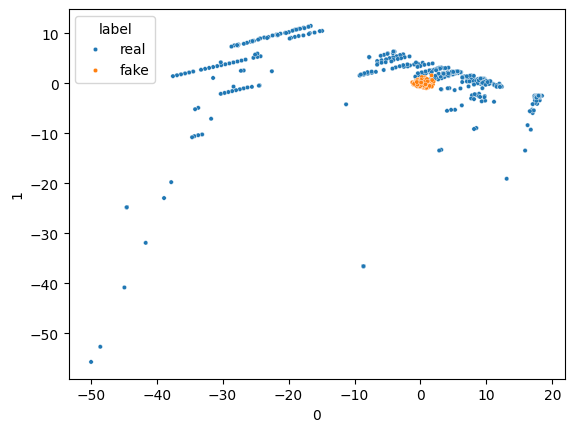

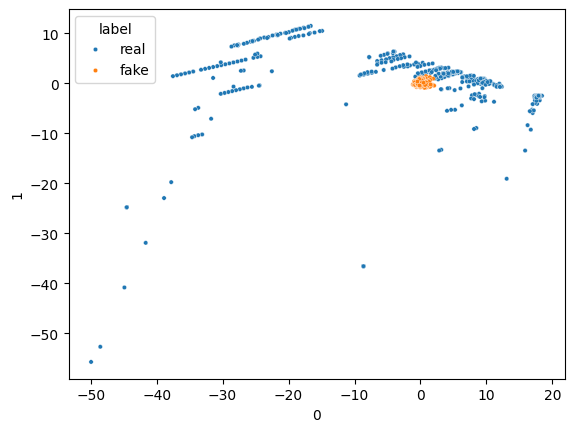

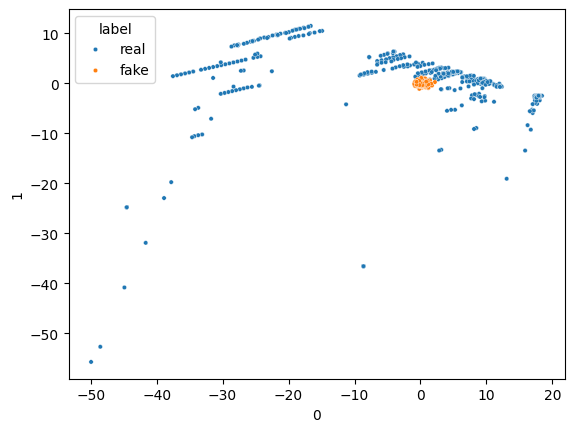

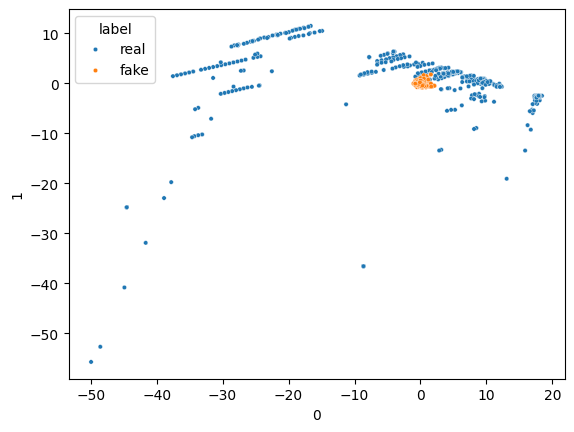

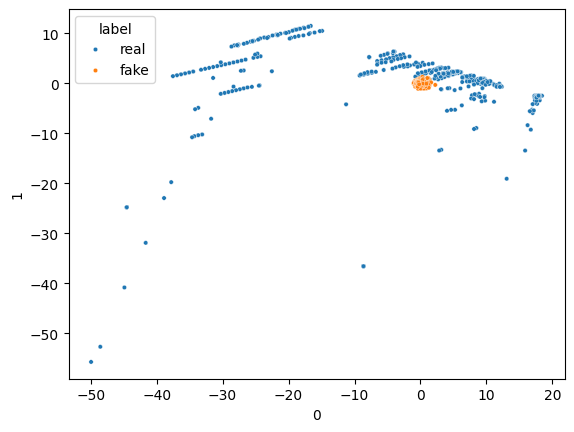

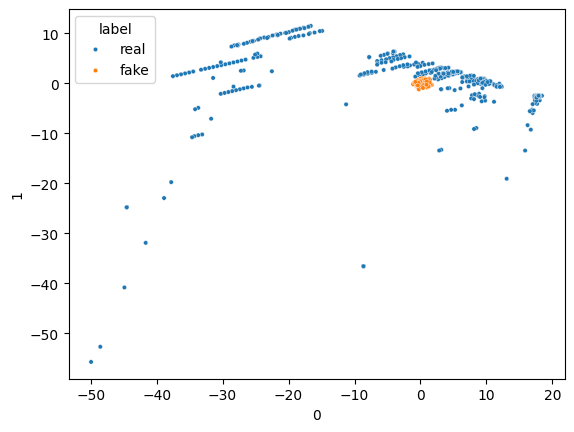

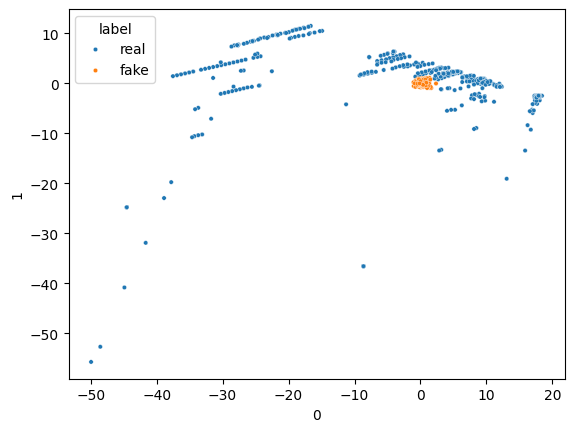

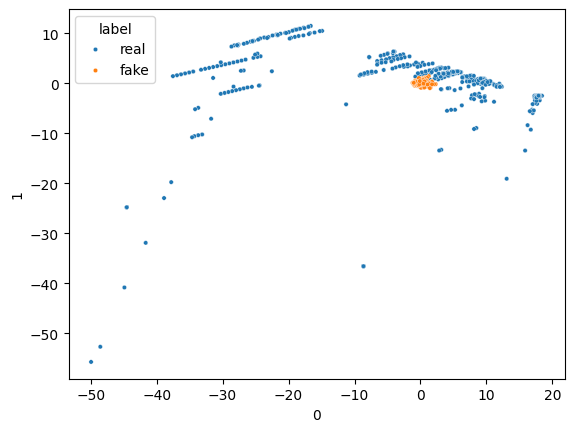

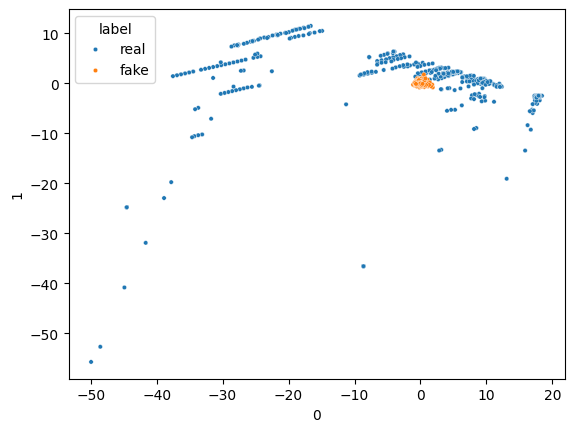

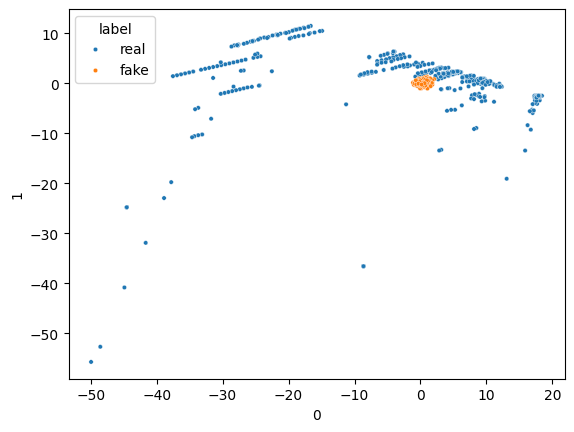

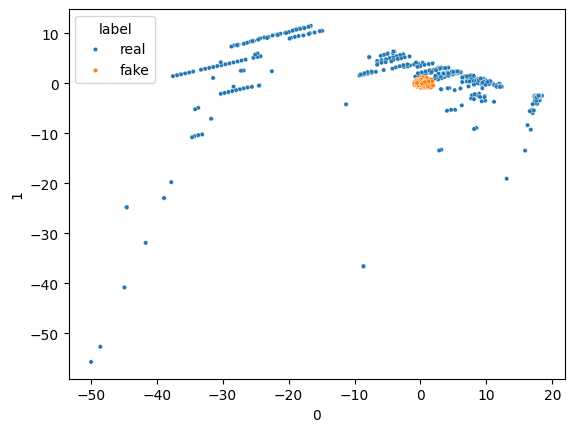

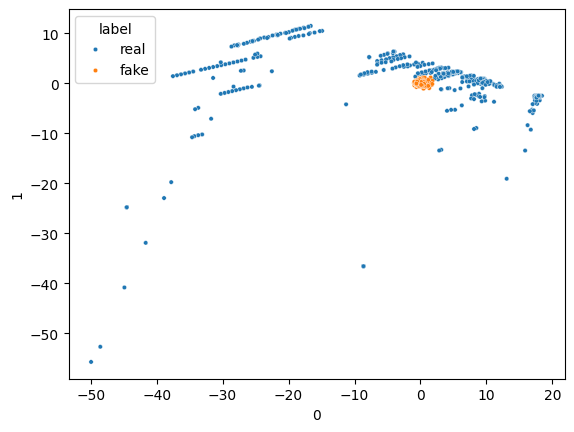

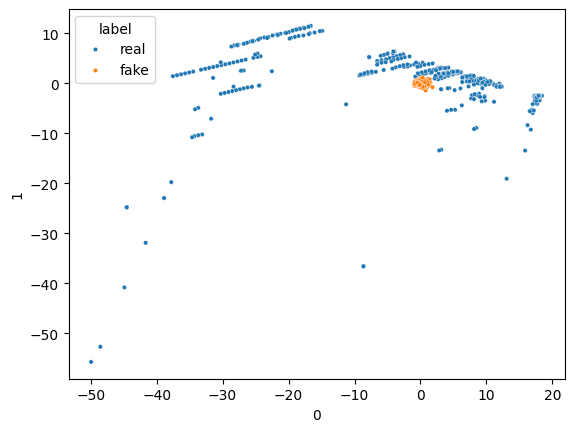

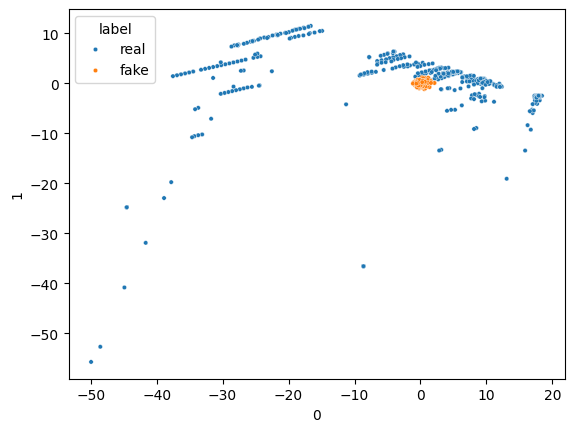

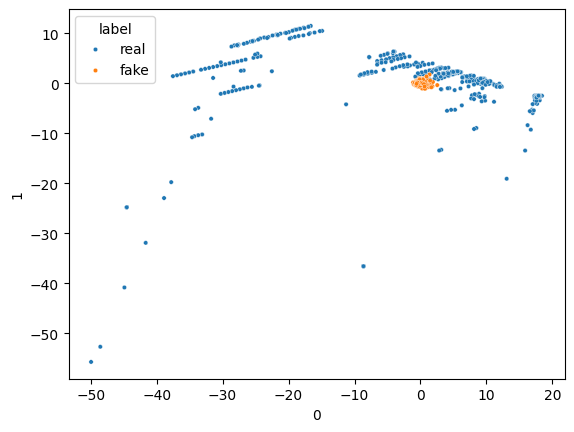

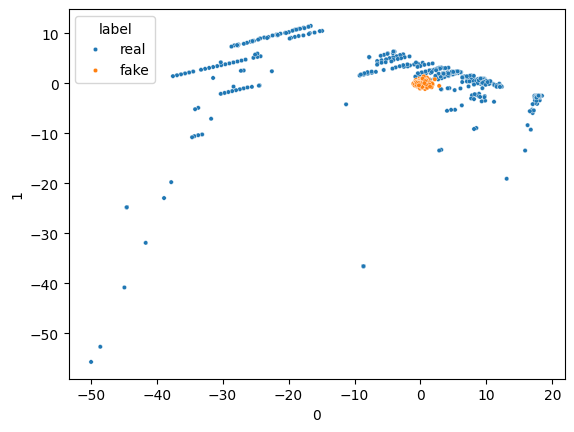

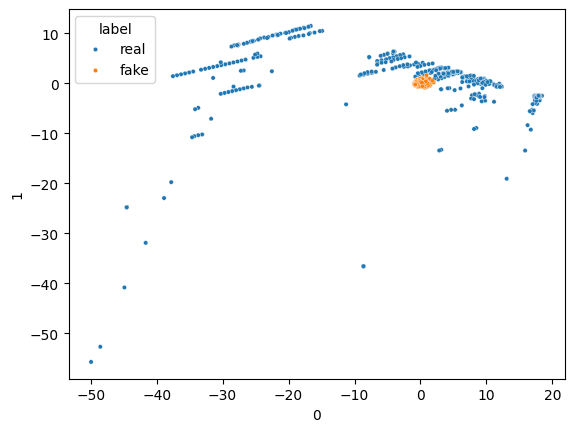

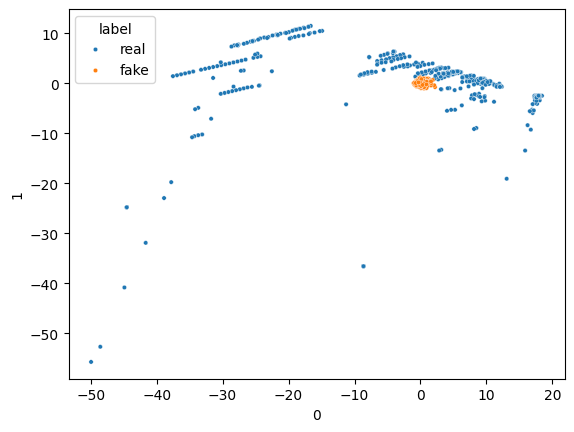

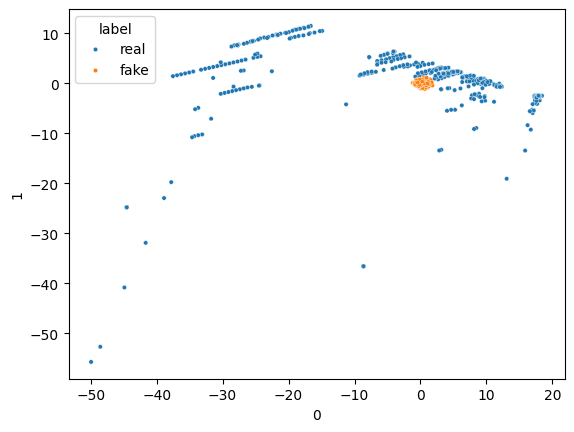

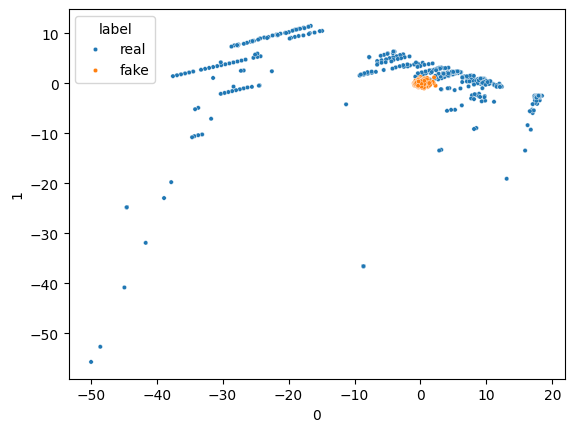

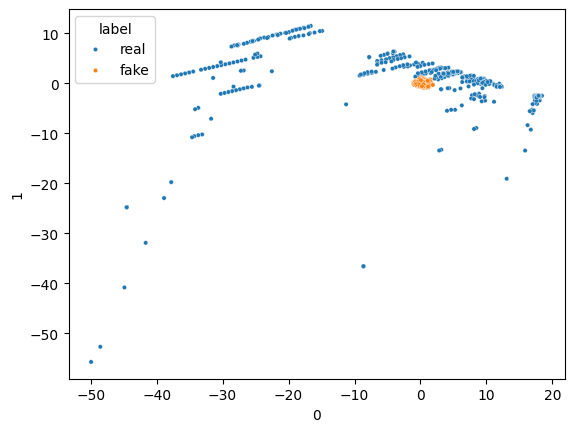

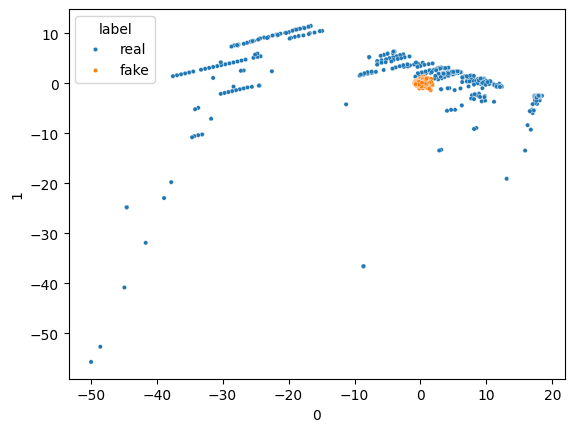

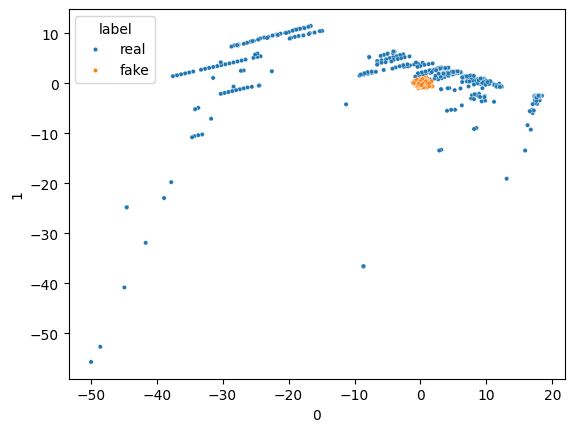

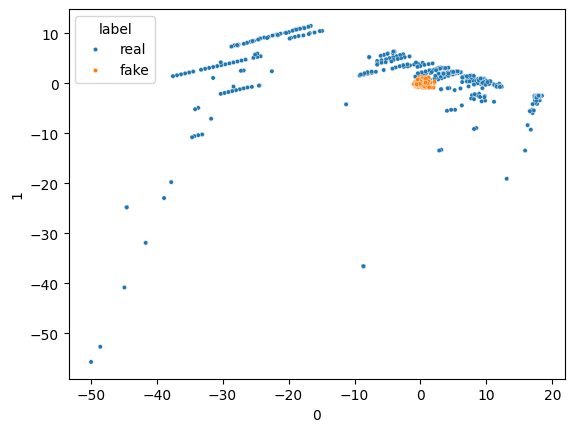

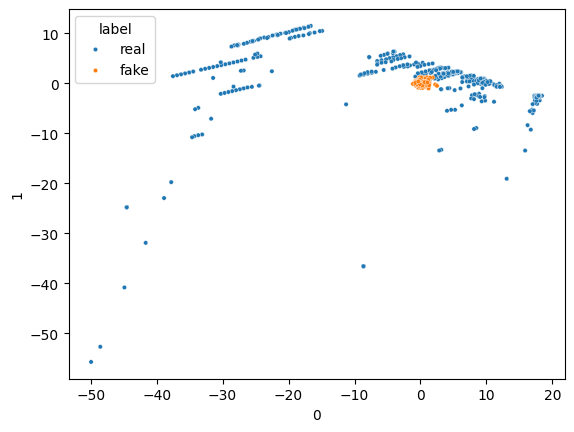

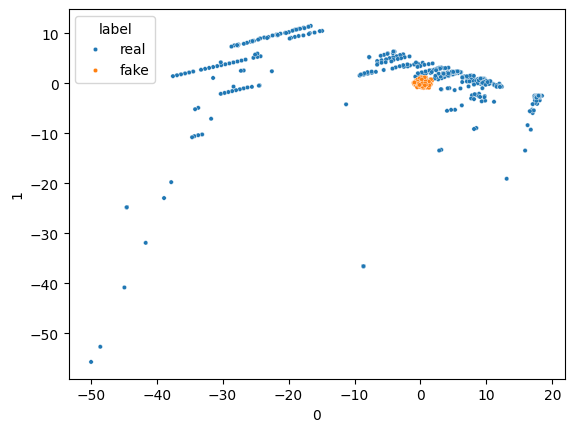

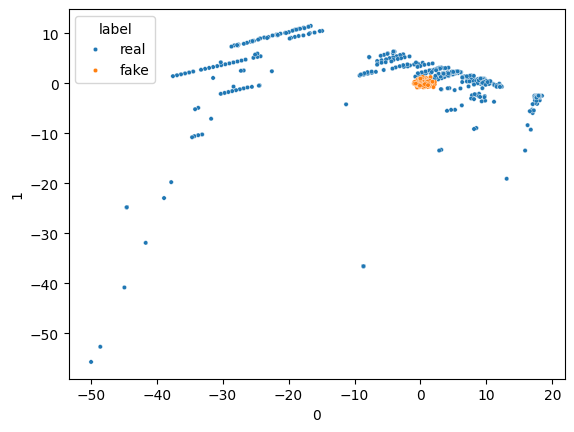

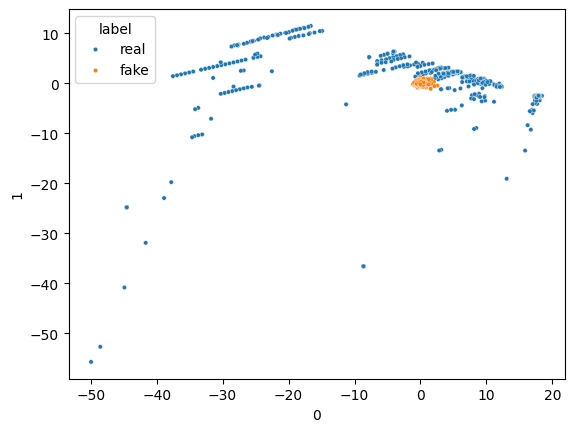

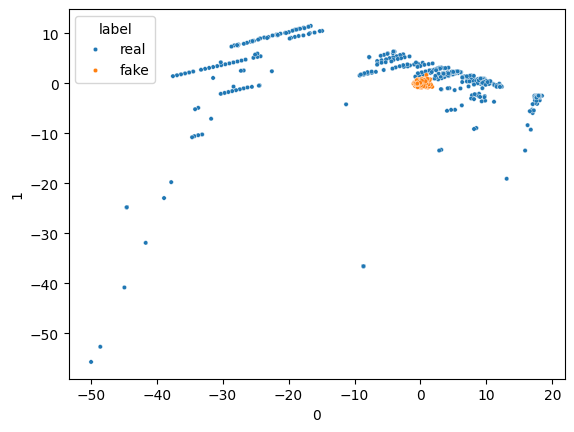

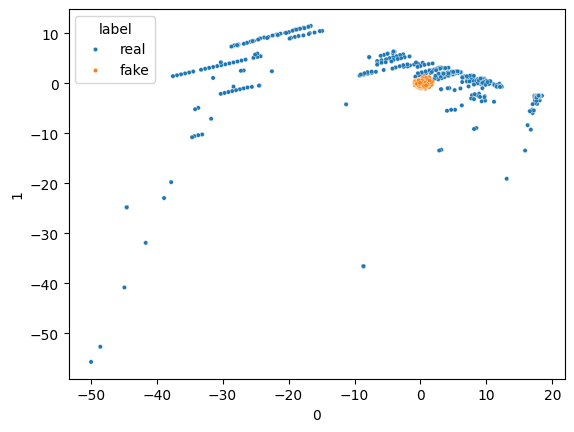

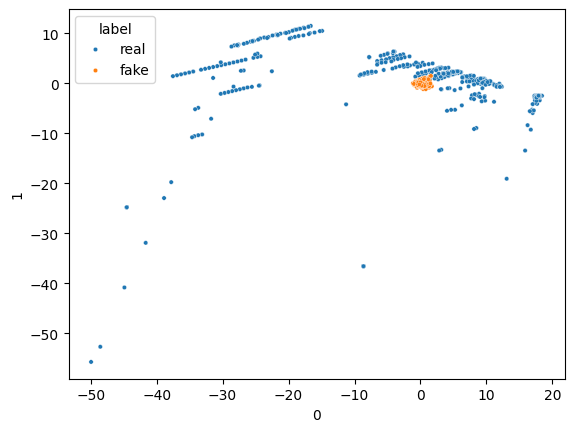

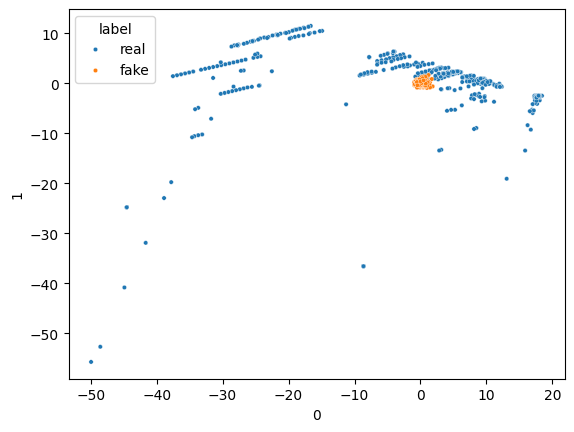

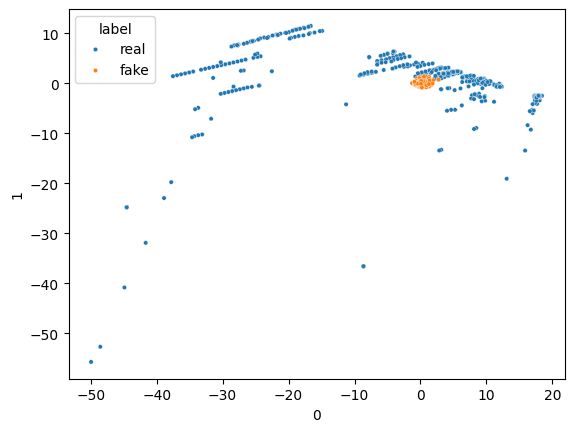

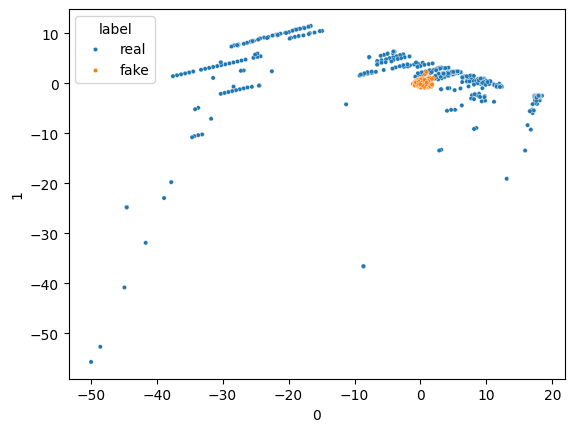

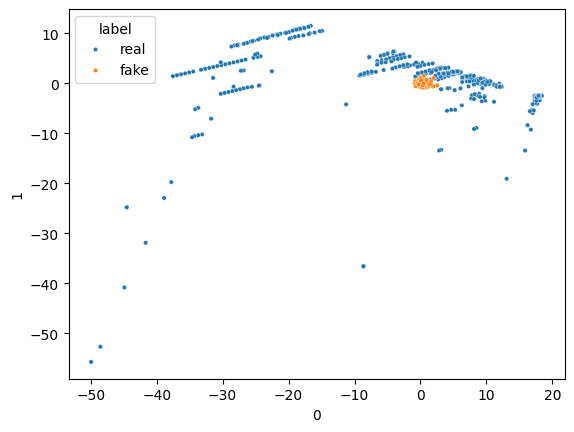

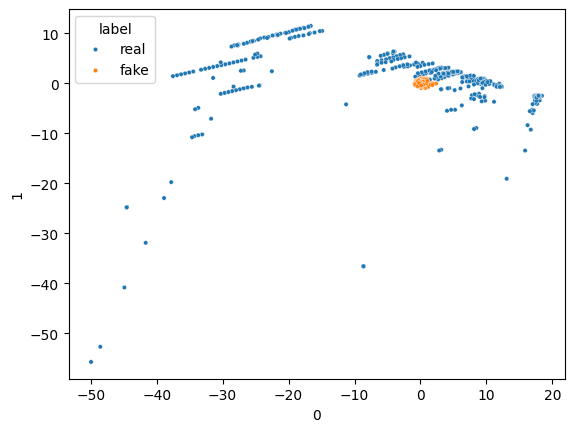

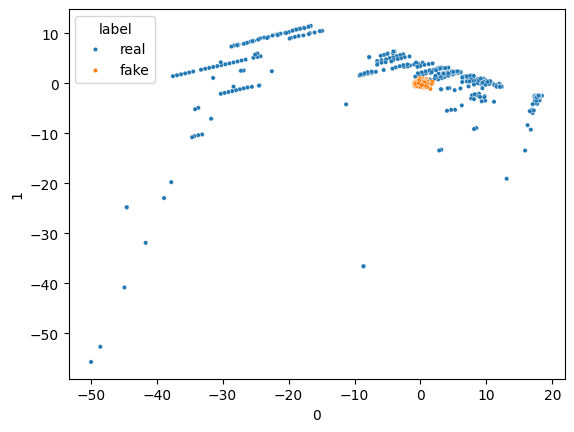

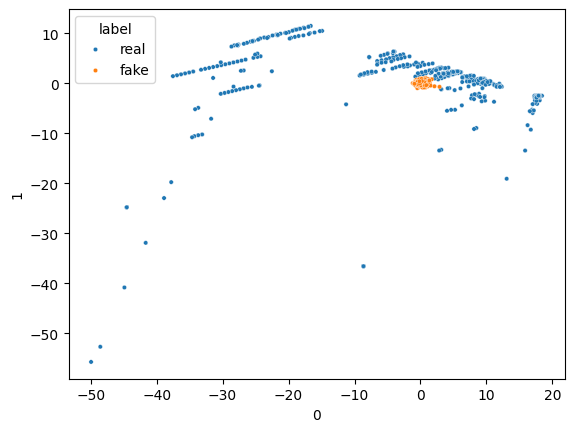

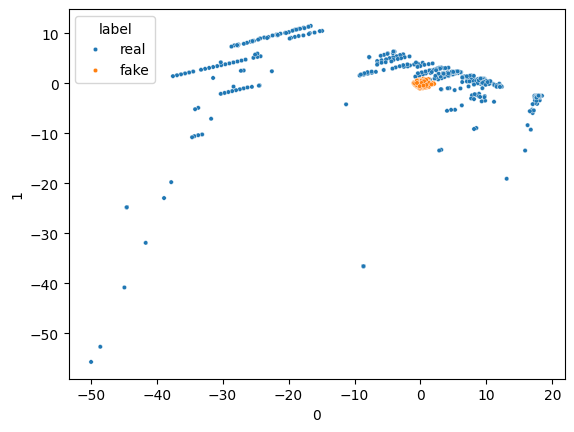

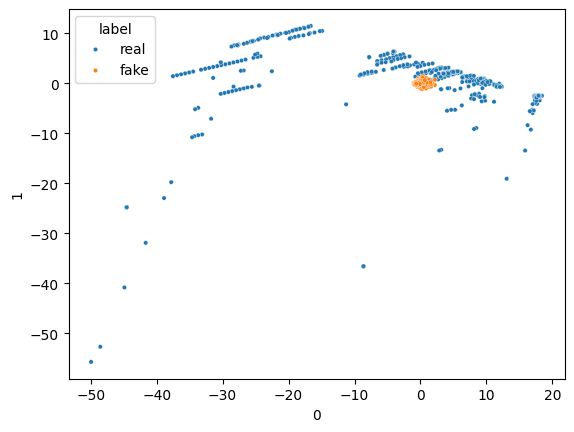

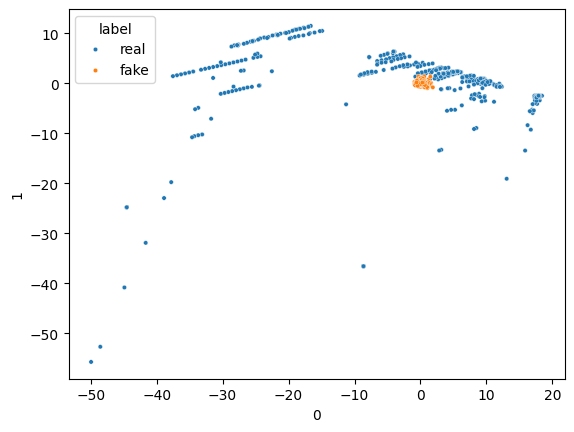

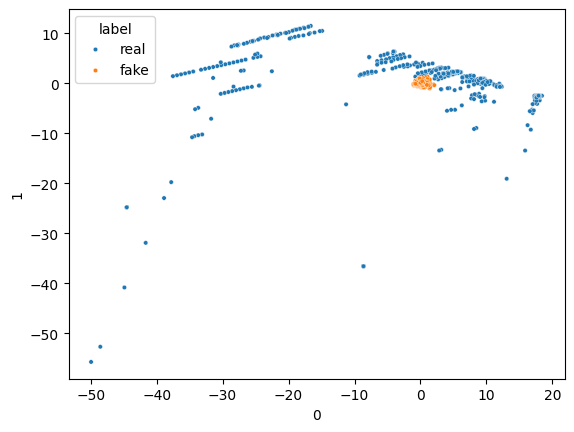

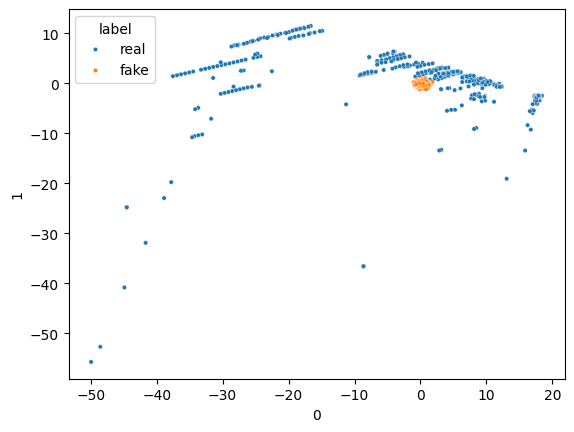

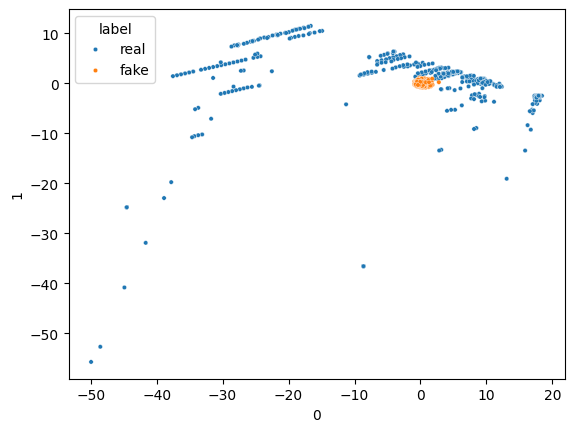

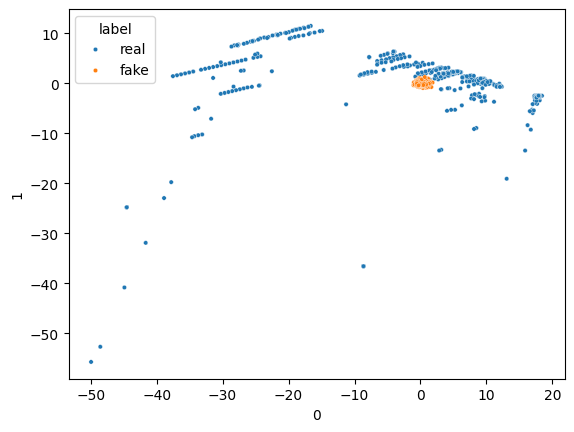

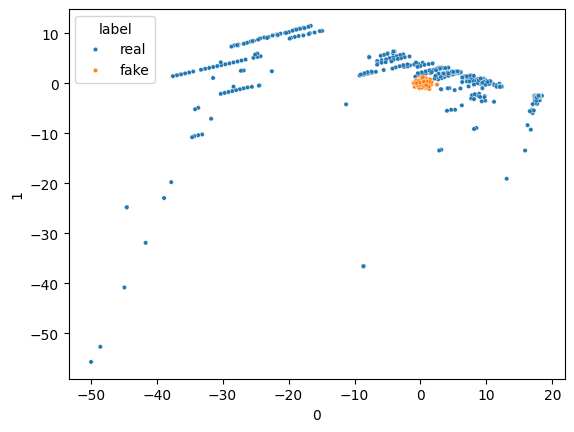

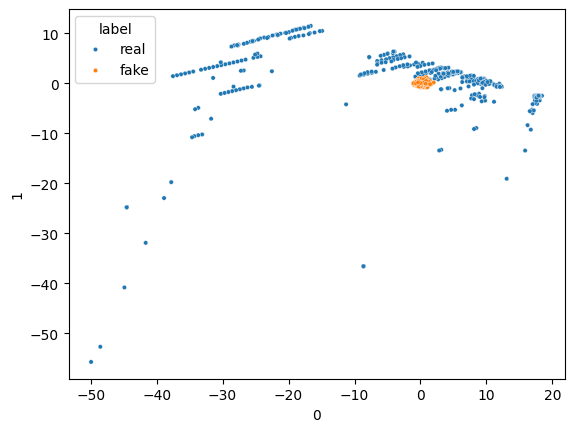

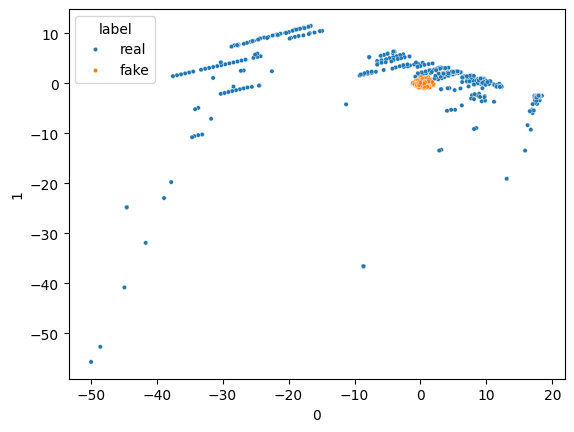

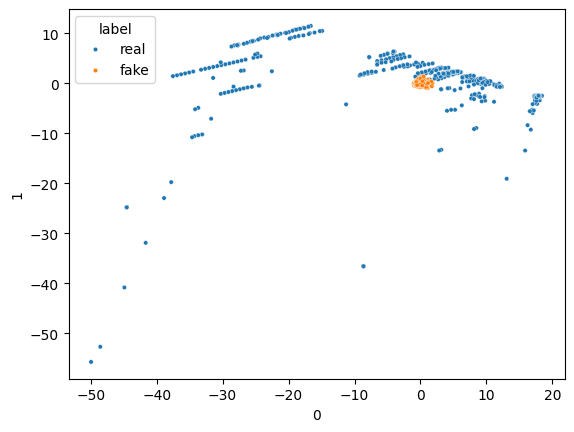

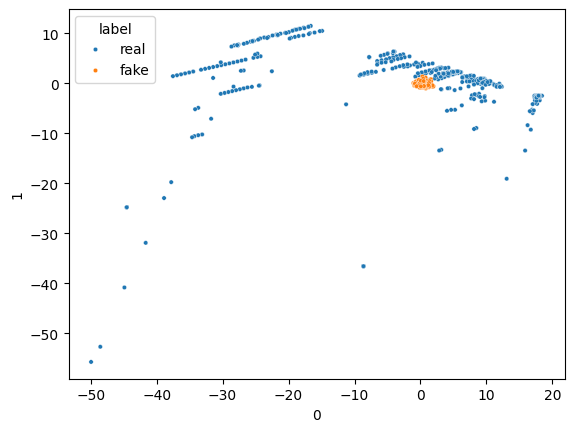

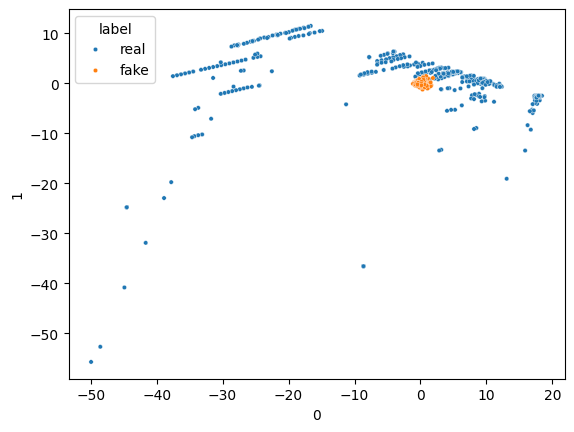

In [60]:
generator=build_generator()
discriminator=build_discriminator()
gan=build_gan(generator,discriminator)
gan.compile(optimizer='adam',loss='binary_crossentropy')

num_epochs=1000
batch_size=64
half_batch=int(batch_size/2)
for epochs in range(num_epochs):
    X_fake=generate_synthetic_data(generator,half_batch)
    y_fake=np.zeros((half_batch,1))
    X_real=data_fraud.sample(half_batch).drop("Class",axis=1)
    y_real=np.ones((half_batch,1))

    discriminator.trainable=True
    discriminator.train_on_batch(X_real,y_real)
    discriminator.train_on_batch(X_fake,y_fake)

    noise=np.random.normal(0,1,(batch_size,29))
    gan.train_on_batch(noise,np.ones((batch_size,1)))

    if epochs%10==0:
        monitor_generator(generator)


### Task 7 - Generate synthetic data using the trained Generator

*   Generate 1000 fradulent data points using the trained generator
*   Compare the distribution of `real` and `synthetic` fradulent data points.


In [ ]:
synthetic_data=generate_synthetic_data(generator,1000)
df=pd.DataFrame(synthetic_data)
df['label']='fake'

df2=data_fraud.drop('Class',axis=1)
df2['label']='real'
df2.column=df.columns
combined_df=pd.concat([df,df2])
combined_df


C:\Users\jidaa\AppData\Local\Temp\ipykernel_70264\3017169904.py:7: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



0    1         2    3         4         5         6         7  \
0      0.000000  0.0  1.205385  0.0  0.616376  1.157341  0.572460  0.000000   
1      0.024844  0.0  0.231874  0.0  0.000000  0.168297  0.013345  0.125326   
2      0.000000  0.0  0.446951  0.0  0.163737  0.900224  0.258812  0.000000   
3      0.603288  0.0  1.782943  0.0  0.556408  1.608677  0.341219  0.000000   
4      0.000000  0.0  0.470289  0.0  0.000000  0.479409  0.000000  0.480965   
...         ...  ...       ...  ...       ...       ...       ...       ...   
50487       NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN   
50488       NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN   
50489       NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN   
50490       NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN   
50491       NaN  NaN       NaN  NaN       NaN       NaN       NaN       NaN   

             8         9  ...       V20       V21       V22       V23  \
0      0.00000  0.210219  ...       NaN       NaN       NaN       NaN   
1      0.00000  0.042641  ...       NaN       NaN       NaN       NaN   
2      0.00000  0.474272  ...       NaN       NaN       NaN       NaN   
3      0.17723  0.311799  ...       NaN       NaN       NaN       NaN   
4      0.00000  0.380662  ...       NaN       NaN       NaN       NaN   
...        ...       ...  ...       ...       ...       ...       ...   
50487      NaN       NaN  ...  1.252967  0.778584 -0.319189  0.639419   
50488      NaN       NaN  ...  0.226138  0.370612  0.028234 -0.145640   
50489      NaN       NaN  ...  0.247968  0.751826  0.834108  0.190944   
50490      NaN       NaN  ...  0.306271  0.583276 -0.269209 -0.456108   
50491      NaN       NaN  ... -0.017652 -0.164350 -0.295135 -0.072173   

            V24       V25       V26       V27       V28    Amount  
0           NaN       NaN       NaN       NaN       NaN       NaN  
1           NaN       NaN       NaN       NaN       NaN       NaN  
2           NaN       NaN       NaN       NaN       NaN       NaN  
3           NaN       NaN       NaN       NaN       NaN       NaN  
4           NaN       NaN       NaN       NaN       NaN       NaN  
...         ...       ...       ...       ...       ...       ...  
50487 -0.294885  0.537503  0.788395  0.292680  0.147968  1.277825  
50488 -0.081049  0.521875  0.739467  0.389152  0.186637 -0.369281  
50489  0.032070 -0.739695  0.471111  0.385107  0.194361 -0.042898  
50490 -0.183659 -0.328168  0.606116  0.884876 -0.253700  0.664244  
50491 -0.450261  0.313267 -0.289617  0.002988 -0.015309 -0.192527  

[1492 rows x 59 columns]

Checking the individual feature distribution of `synthetic` and `real` fraud data.

In [58]:
for col in combined_df.columns:
  plt.figure()
  fig = px.histogram(combined_df, color = 'label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()

C:\Users\jidaa\AppData\Local\Temp\ipykernel_70264\3618524353.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>